<center><img src="https://javier.rodriguez.org.mx/itesm/2014/tecnologico-de-monterrey-blue.png" width="450" align="center"></center>
<br><p><center><h1><b>Analysis of Influential Factors on Housing Values in Boston</b></h1></center></p> 
<p><center><h3>Course: <i>Application of Multivariate Methods in Data Science (Group 652)</i></h3></center></p>
<p><center><h4>Instructed by: <i>Dr. Hugo E. Ramirez</i></h4></center></p> 

<p style="text-align: right;">Alejandro Santiago Baca Eyssautier - A01656580</p> 
<p style="text-align: right;">August 12, 2024</p><br>

<br><br><p><h4> <b>Introduction</b> </h4></p>

This project focuses on the analysis of the housing dataset in Boston. The objective is to identify the most important characteristics that influence the average housing value (medv) and visualize these characteristics using various data analysis techniques.

<br><p><h4> <b>Data Description</b> </h4></p>

The dataset contains 14 variables that describe various characteristics of the housing in Boston. Below is a brief description of each of these variables:

1. **crim**: Per capita crime rate.
2. **zn**: Proportion of residential land zoned for lots over 25,000 square feet.
3. **indus**: Proportion of non-retail business acres per town.
4. **chas**: Charles River dummy variable (1 if the tract bounds the river; 0 otherwise).
5. **nox**: Nitric oxides concentration (parts per 10 million).
6. **rm**: Average number of rooms per dwelling.
7. **age**: Proportion of owner-occupied units built prior to 1940.
8. **dis**: Weighted distances to five Boston employment centers.
9. **rad**: Index of accessibility to radial highways.
10. **tax**: Property tax rate per $10,000.
11. **ptratio**: Pupil-teacher ratio by town.
12. **b**: Proportion of Black residents by town.
13. **lstat**: Percentage of the population with low socioeconomic status.
14. **medv**: Median value of owner-occupied homes (in thousands of dollars).

<br>

Afterward, the necessary libraries for data analysis and visualization will be imported. Then, the Boston housing dataset will be loaded, and an initial exploration will be conducted to better understand the structure and content of the data. This will include checking for missing values as well as displaying the first few rows and basic statistics of the dataset.

In [29]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from pandas.plotting import andrews_curves, radviz

In [30]:
# Load the Boston Housing dataset
file_path = 'BostonHousing.csv'
boston_data = pd.read_csv(file_path)

# Check if there are any missing values in the dataset
print('Number of missing values in the dataset:', boston_data.isnull().sum().sum())

# Display the first few rows of the dataset and basic statistics to understand the data
print('\n', boston_data.head(), '\n\n', boston_data.describe())

Number of missing values in the dataset: 0

       crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2   

              crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617 

<br>

It was observed that the dataset does not contain any missing values, which facilitates further analysis. The descriptive statistics provide an overview of the distributions of the variables, indicating that there is significant variability in some characteristics, such as crim and tax, with substantial differences between the minimum and maximum values.

<br><br><p><h4> <b>Visualization of Variable Distributions</b> </h4></p>

Next, visualizations will be created to better understand the distribution of each variable in the dataset. First, histograms will be generated for all variables, allowing us to observe the frequency of values within different ranges. Subsequently, kernel density estimate (KDE) plots will be created for the same variables, providing a smooth representation of the data distribution. These visualizations help identify patterns and anomalies in the data, as well as understand the dispersion and concentration of the values.

<br>

##### - *Histograms*

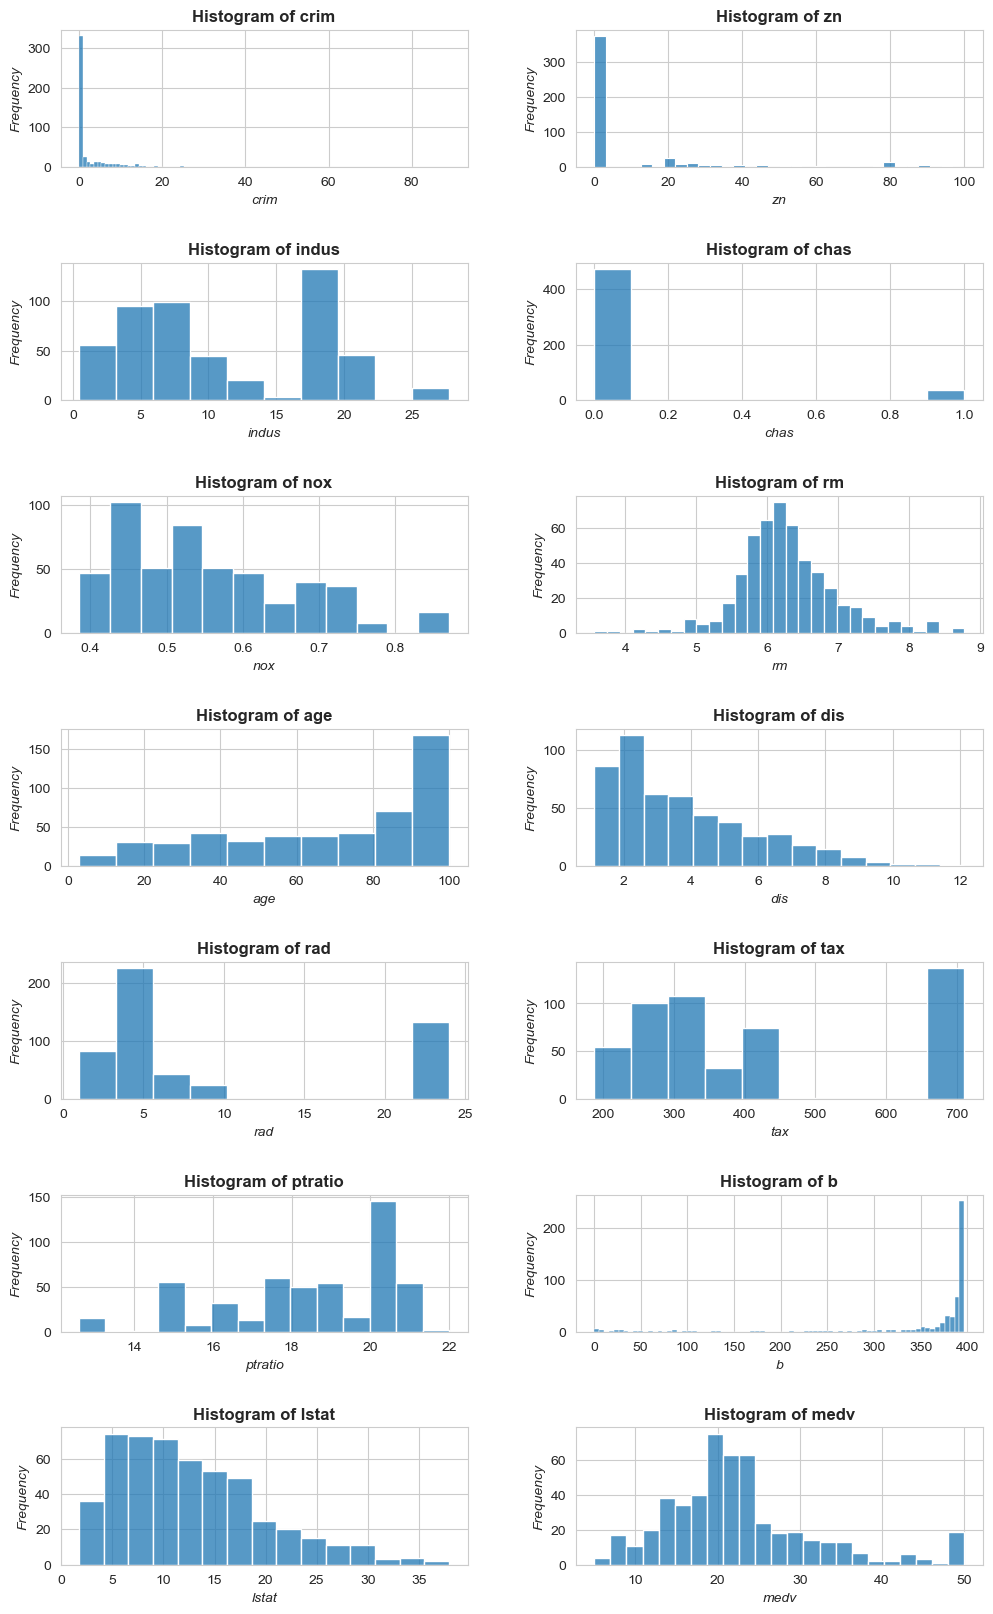

In [31]:
columns = boston_data.columns
sns.set_style('whitegrid')

# Plot histograms for all variables
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(11, 17))
fig.tight_layout(pad=5.0)
for i, ax in enumerate(axes.flatten()):
    if i < len(columns):
        sns.histplot(boston_data[columns[i]], ax=ax)
        ax.set_title(f'Histogram of {columns[i]}', fontweight='bold')
        ax.set_xlabel(columns[i], fontstyle='italic')
        ax.set_ylabel('Frequency', fontstyle='italic')
    else:
        ax.set_visible(False)
plt.show()

<br>

##### - *Kernel Density Estimates (KDE)*

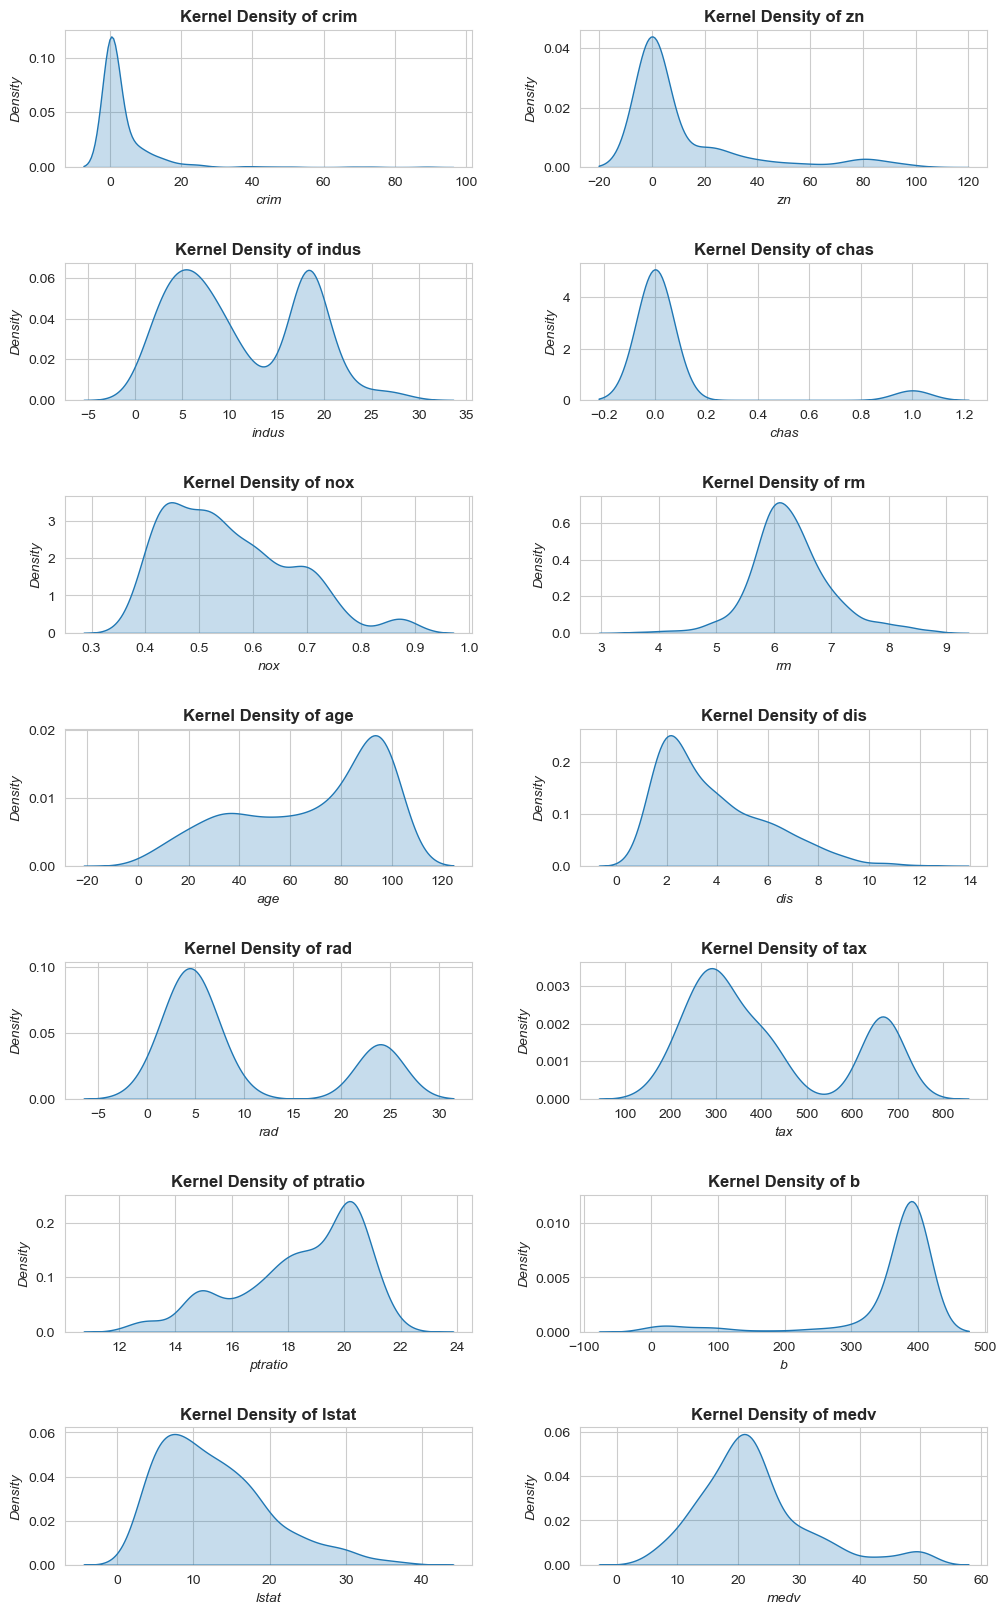

In [32]:
# Plot Kernel Density Estimations for all variables
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(11, 17))
fig.tight_layout(pad=5.0)
for i, ax in enumerate(axes.flatten()):
    if i < len(columns):
        sns.kdeplot(boston_data[columns[i]], ax=ax, fill=True)
        ax.set_title(f'Kernel Density of {columns[i]}', fontweight='bold')
        ax.set_xlabel(columns[i], fontstyle='italic')
        ax.set_ylabel('Density', fontstyle='italic')
    else:
        ax.set_visible(False)
plt.show()

<br>

By observing the histograms of the variables as well as the kernel density estimates (KDE) from the Boston housing dataset, several important patterns can be noted:

- **Per Capita Crime Rate (crim)**: Most values are concentrated in the low range (0-10), with some outliers reaching up to 90.
- **Proportion of Residential Land (zn)**: Most values are 0, indicating that many areas are not zoned for large residential lots.
- **Proportion of Non-Retail Business Acres by City (indus)**: The values are distributed across several peaks, indicating areas with different levels of industrial development.
- **Charles River Dummy Variable (chas)**: Most values are 0, with only a few areas bordering the river.
- **Nitric Oxide Concentration (nox)**: Most values are between 0.4 and 0.7.
- **Average Number of Rooms per Dwelling (rm)**: The distribution is approximately normal, with a peak around 6 rooms.
- **Proportion Built Before 1940 (age)**: The distribution shows that many dwellings are quite old, with a large number built before 1940.
- **Weighted Distances (dis)**: Most distances are between 1 and 10.
- **Radial Highway Accessibility Index (rad)**: There are several peaks, indicating different levels of accessibility in various areas.
- **Property Tax Rate (tax)**: There are several peaks, with a notable cluster of high values.
- **Student-Teacher Ratio by City (ptratio)**: The distribution is quite varied, with some peaks at certain values.
- **Proportion of Black Residents by City (b)**: Most values are concentrated at the upper end of the scale.
- **Percentage of Population with Low Socioeconomic Status (lstat)**: Most values are in the low range (0-20).
- **Average Home Value (medv)**: The distribution is approximately normal, with a peak around 20-25.

In summary:

1. **Variability and Distribution**: Many variables exhibit significant variability, suggesting substantial differences in housing characteristics across different areas.
2. **Presence of Outliers**: Some variables, such as `crim` and `tax`, have outliers that may influence subsequent analyses.
3. **Multimodal Distributions**: Variables like `indus` and `rad` show multimodal distributions, indicating the presence of different subgroups in the data.

These initial findings provide a solid foundation for further analysis, allowing for the identification of which variables may be most relevant and how they are distributed within the dataset.

<br><br><p><h4> <b>Correlation Analysis and Feature Importance</b> </h4></p>

In this section, correlations will be calculated between each feature and the target variable `medv` to identify the most influential variables on the average home value. First, the correlation matrix will be computed, and features will be ranked by the absolute value of their correlation with `medv`. Then, a Random Forest model will be trained multiple times to compute the importance of each feature in predicting `medv`, averaging the importances obtained across multiple iterations. Finally, the main features will be selected based on both methods (correlations and importances) without duplicates, for a more detailed analysis later.

In [33]:
# Calculate the correlation matrix
corr_matrix = boston_data.corr()

# Calculate the correlation of each feature with the target variable 'medv'
correlations = corr_matrix['medv'].drop('medv')

# Create a DataFrame for the correlations sorted by absolute value
correlation_df = pd.DataFrame({'Feature': correlations.index, 'Correlation': correlations.values})
correlation_df = correlation_df.reindex(correlation_df['Correlation'].abs().sort_values(ascending=False).index)

# Display the correlation DataFrame
correlation_df

,Feature,Correlation
12,lstat,-0.737663
5,rm,0.695360
10,ptratio,-0.507787
2,indus,-0.483725
9,tax,-0.468536
4,nox,-0.427321
0,crim,-0.388305
8,rad,-0.381626
6,age,-0.376955
1,zn,0.360445


In [34]:
# Prepare the data for Random Forest feature importance
X = boston_data.drop('medv', axis=1)
y = boston_data['medv']

# Number of iterations
importances = np.zeros((10, X.shape[1]))

# Train Random Forest Regressor multiple times with different random seeds
for i in range(len(importances)):
    random_seed = np.random.randint(0, 10000)
    rf = RandomForestRegressor(n_estimators=100, random_state=random_seed)
    rf.fit(X, y)
    importances[i, :] = rf.feature_importances_

# Average the feature importances
mean_importances = importances.mean(axis=0)

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': mean_importances}).sort_values(
    by='Importance', ascending=False)

# Display feature importances
feature_importance_df

,Feature,Importance
5,rm,0.437299
12,lstat,0.368912
7,dis,0.065330
0,crim,0.039346
4,nox,0.022303
10,ptratio,0.016459
9,tax,0.014235
6,age,0.012827
11,b,0.011310
2,indus,0.006132


In [35]:
# Select the top 4 features from both correlation and feature importance DataFrames without duplicates
selected_features = list(set(correlation_df['Feature'].values[:4]).union(set(feature_importance_df['Feature'].values[:4])))
print("Selected Features: ", selected_features)

Selected Features:  ['ptratio', 'indus', 'lstat', 'crim', 'rm', 'dis']


<br>

When calculating the correlations of the features with the average home value (`medv`), it was observed that `lstat` (percentage of population with low socioeconomic status) has the strongest negative correlation, while `rm` (average number of rooms per dwelling) has the strongest positive correlation. When assessing feature importance using a Random Forest model, it was found that `rm` and `lstat` are also the most important features for predicting `medv`. The selected features, based on the combination of both methods (correlation and importance), are `crim`, `dis`, `indus`, `lstat`, `rm`, and `ptratio`. These features stand out for their influence in both the correlations and the calculated importances, providing a solid foundation for further analyses and visualizations.

<br><br><p><h4> <b>Scatter and Variability Visualization of the Variables</b> </h4></p>

Next, additional visualizations will be created to analyze the selected features in more depth. First, a pairplot will be generated, showing scatter plots between the selected variables and the target variable `medv`, with density distributions on the diagonal, to identify relationships and patterns among the variables. Then, boxplots will be created for each of the selected features, allowing for the visualization of the distribution, median, and potential outliers of each variable. These visualizations will provide a more detailed understanding of how the selected variables relate to each other and to the target variable, as well as their internal variability.

<br>

##### - *Scatter Plots*

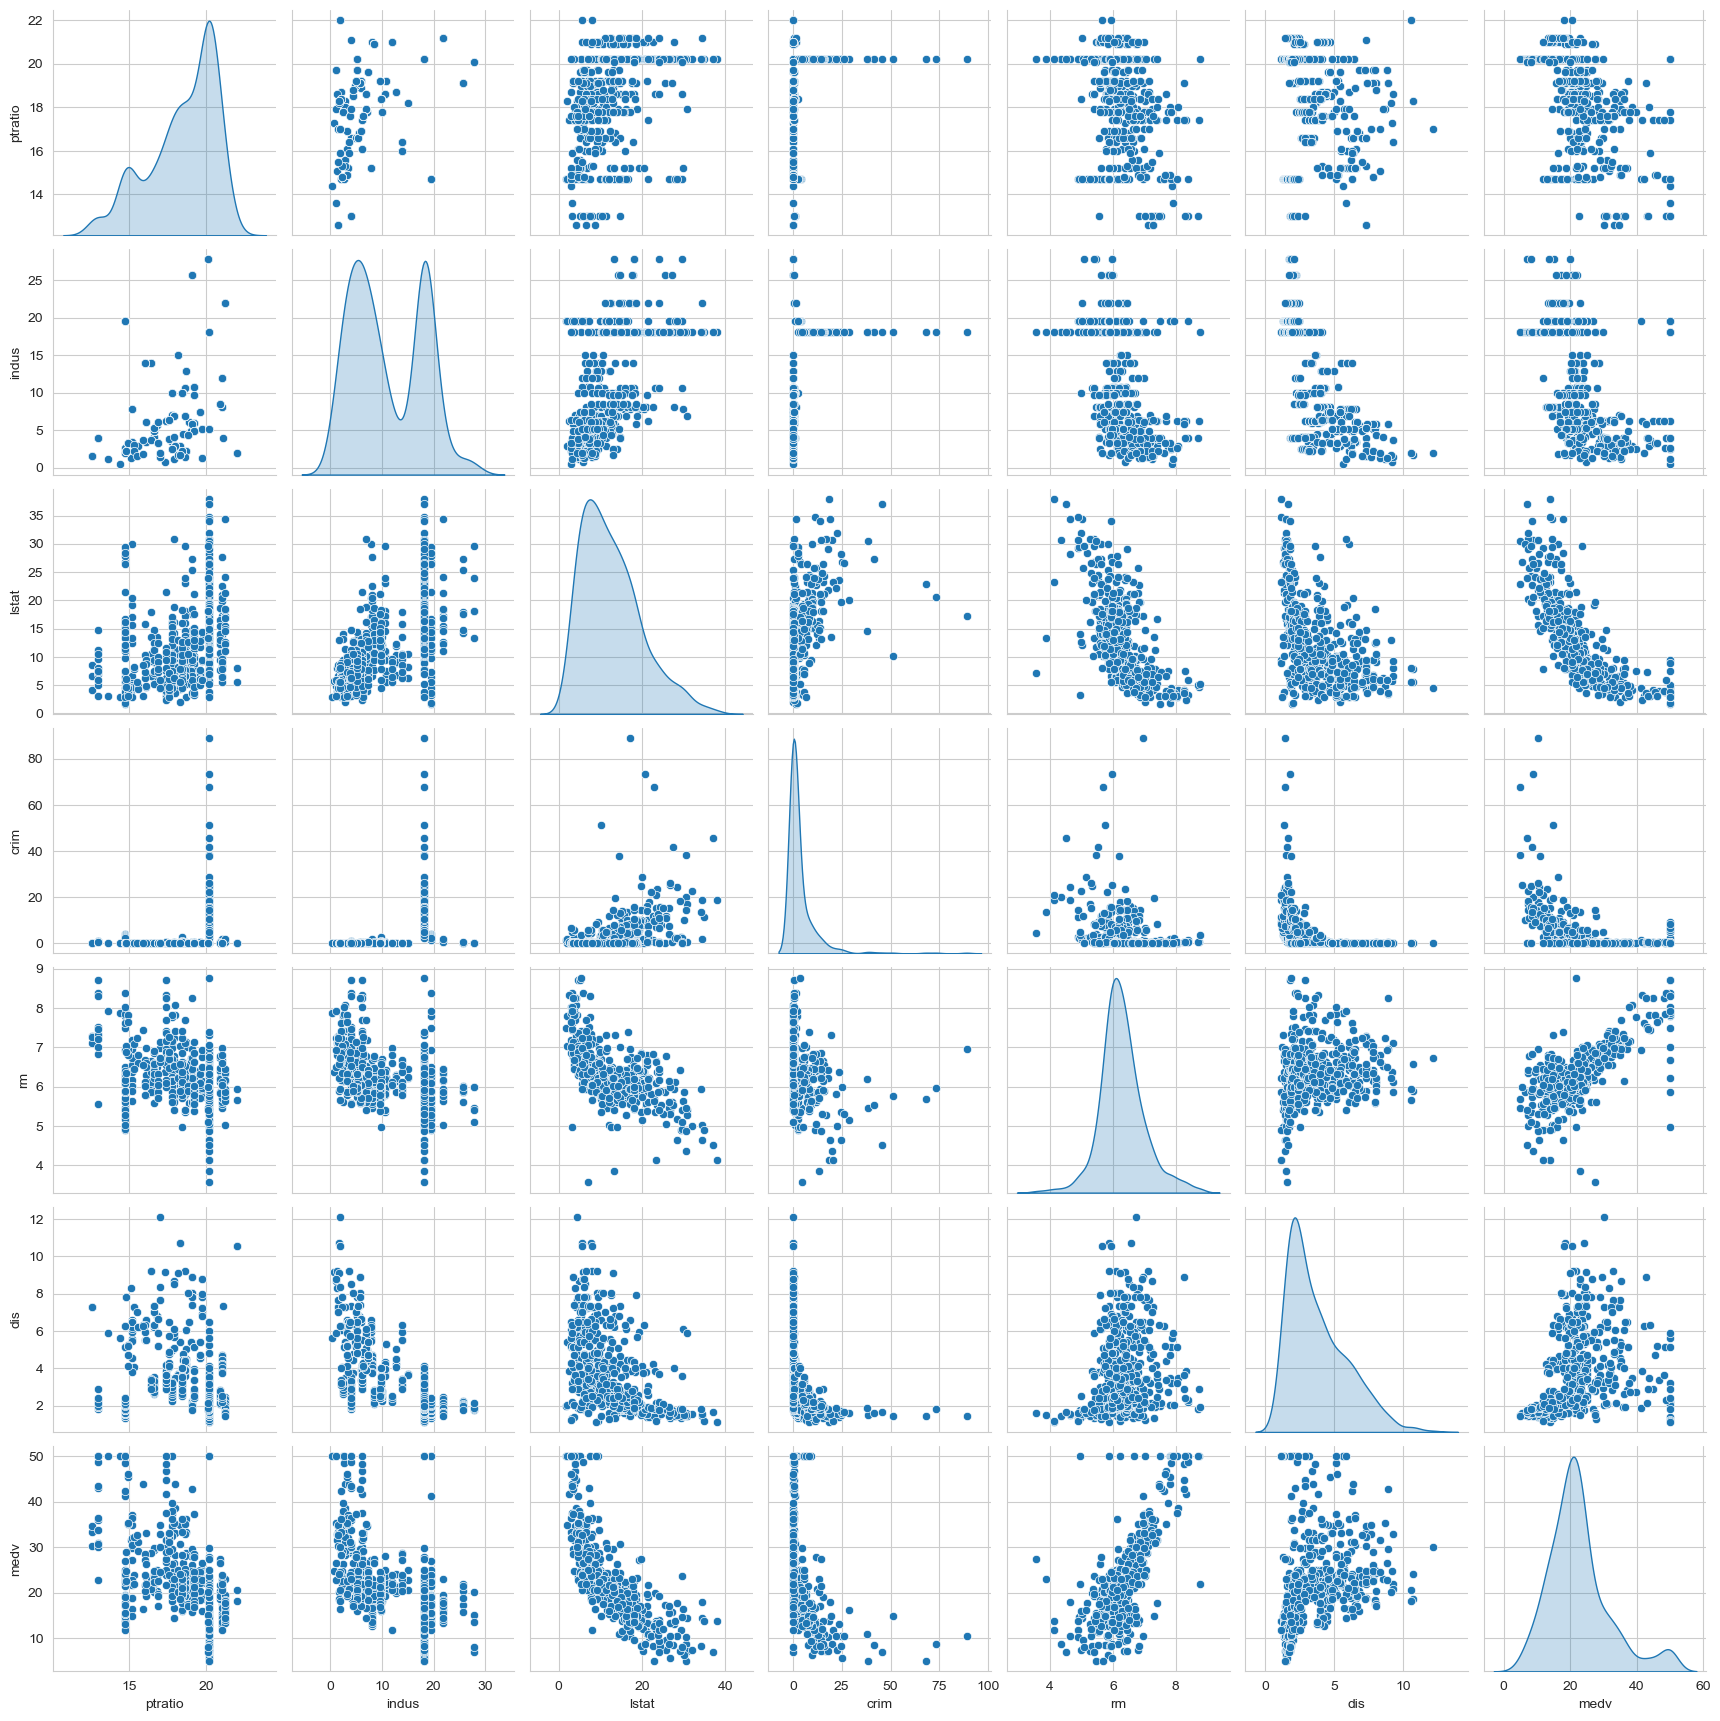

In [36]:
# Plot pairplot to visualize scatter plots between variables
sns.pairplot(boston_data[selected_features + ['medv']], diag_kind='kde')
plt.show()

The pairplot shows the relationships between the selected variables (`crim`, `dis`, `indus`, `lstat`, `rm`, `ptratio`) and the target variable `medv`. Some important points observed are:

1. **Relationship between `rm` and `medv`**: There is a clear positive relationship between the average number of rooms (`rm`) and the average home value (`medv`). As the number of rooms increases, so does the value of the home.
2. **Relationship between `lstat` and `medv`**: A strong negative relationship is observed between the percentage of the population with low socioeconomic status (`lstat`) and `medv`. As `lstat` increases, the value of homes decreases significantly.
3. **Relationship between `ptratio` and `medv`**: There is a less pronounced negative relationship between the student-teacher ratio (`ptratio`) and `medv`, suggesting that a higher `ptratio` is associated with lower home values.
4. **Distributions of the Variables**: The distributions of `crim` and `indus` are skewed to the left, while `rm` shows a more normal distribution.
5. **Outliers**: Several outliers can be identified in the relationships between variables, especially in `crim` and `dis`.

<br>

##### - *Box Plots*

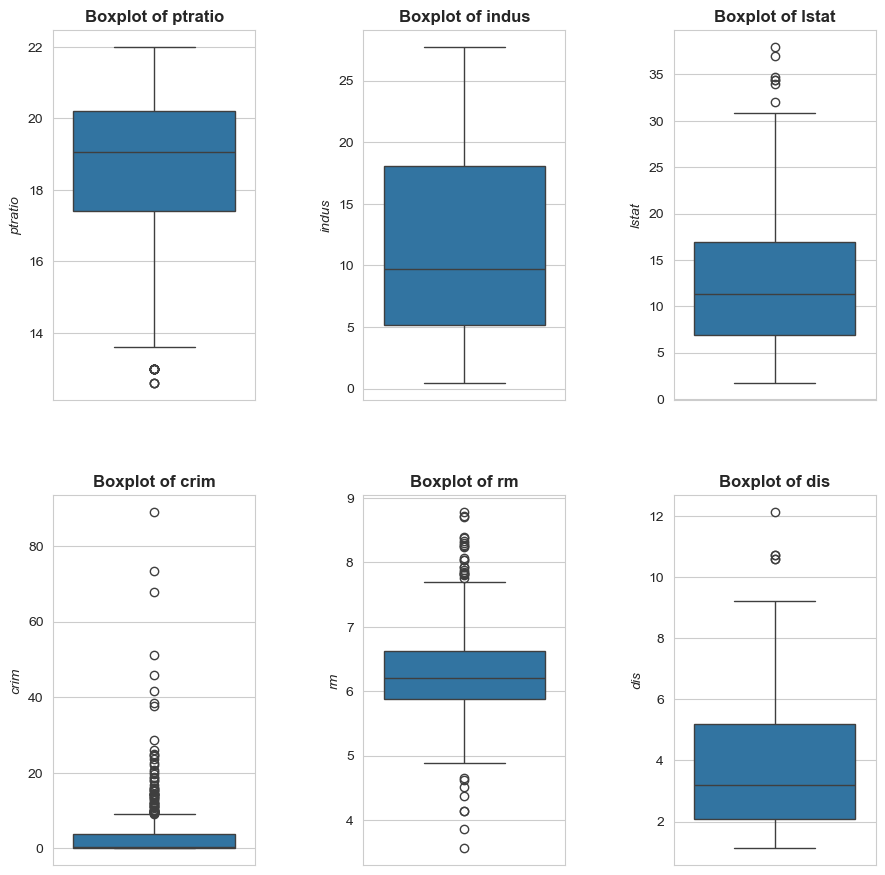

In [37]:
# Plot boxplots for the selected variables
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 10))
fig.tight_layout(pad=5.0)

for i, ax in enumerate(axes.flatten()):
    # Ajdust the color brightness for better visualization
    sns.boxplot(data=boston_data, y=selected_features[i], ax=ax)
    ax.set_title(f'Boxplot of {selected_features[i]}', fontweight='bold')
    ax.set_ylabel(selected_features[i], fontstyle='italic')
plt.show()

The boxplots provide a clear view of the distribution of the selected variables, as well as the presence of outliers:

1. **`crim` (Crime rate per capita)**: Most values are in the low range, but there are several very high outliers.
2. **`dis` (Weighted distances to employment centers)**: The distribution shows a median of approximately 4, with some outliers in the upper range.
3. **`indus` (Proportion of non-retail business acres)**: The distribution is quite symmetrical with few outliers.
4. **`lstat` (Percentage of population with low socioeconomic status)**: Most values are in the middle range (10-20), with some high outliers.
5. **`rm` (Average number of rooms)**: The distribution is fairly normal with some low and high outliers.
6. **`ptratio` (Student-teacher ratio)**: Most values are in the range of 14 to 22, with some low outliers.

<br>

In summary:

Significant relationships are identified, such as the positive relationship between `rm` and `medv` and the negative relationship between `lstat` and `medv`. Additionally, the distributions of the variables show the presence of several outliers, which could influence subsequent analyses. These findings highlight the importance of the selected features and how they vary in relation to the value of homes in Boston.

<br><br><p><h4> <b>Advanced Feature Visualization</b> </h4></p>

In this section, advanced visualization techniques will be used to analyze the selected features in a more intuitive way. First, Andrew's Curves will be generated, allowing for the visualization of high-dimensional data structure and the detection of patterns and clusters in the data. Then, the Radviz plot will be used as an alternative to Chernoff Faces. The Radviz plot represents multiple variables in a two-dimensional space, allowing the observation of the relationship between various features simultaneously. Both techniques will help identify patterns and complex relationships between the selected features and the variable `medv_bins`, which groups the average home value into discrete ranges.

<br>

##### - *Andrew's Curves*

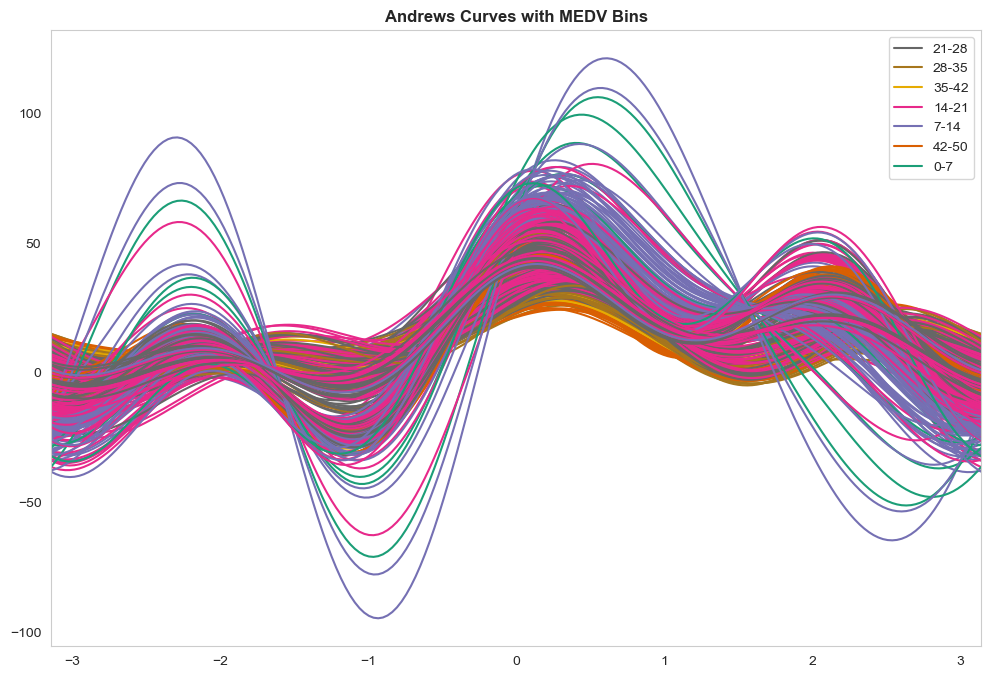

In [38]:
# Group 'medv' into discrete bins
boston_data['medv_bins'] = pd.cut(boston_data['medv'], bins=[0, 7, 14, 21, 28, 35, 42, 50], 
                                  labels=['0-7', '7-14', '14-21', '21-28', '28-35', '35-42', '42-50'])

# Plot Andrews Curves for the selected variables with 'medv_bins'
plt.figure(figsize=(12, 8))
andrews_curves(boston_data[selected_features + ['medv_bins']], 'medv_bins', colormap='Dark2_r')
plt.title('Andrews Curves with MEDV Bins', fontweight='bold')
plt.show()

When observing the Andrew's Curves plot with the discrete ranges of `medv`, we can note the following important points:

1. **Patterns and Groupings**: There are different wavy patterns that can be associated with the different ranges of `medv`. This indicates that the selected features have significant variations among the different groups of home values.
2. **Concentration of Values**: Some lines are more clustered in certain areas of the plot, which may indicate similarities in housing characteristics within certain ranges of `medv`.

<br>

##### - *Radviz Plot*

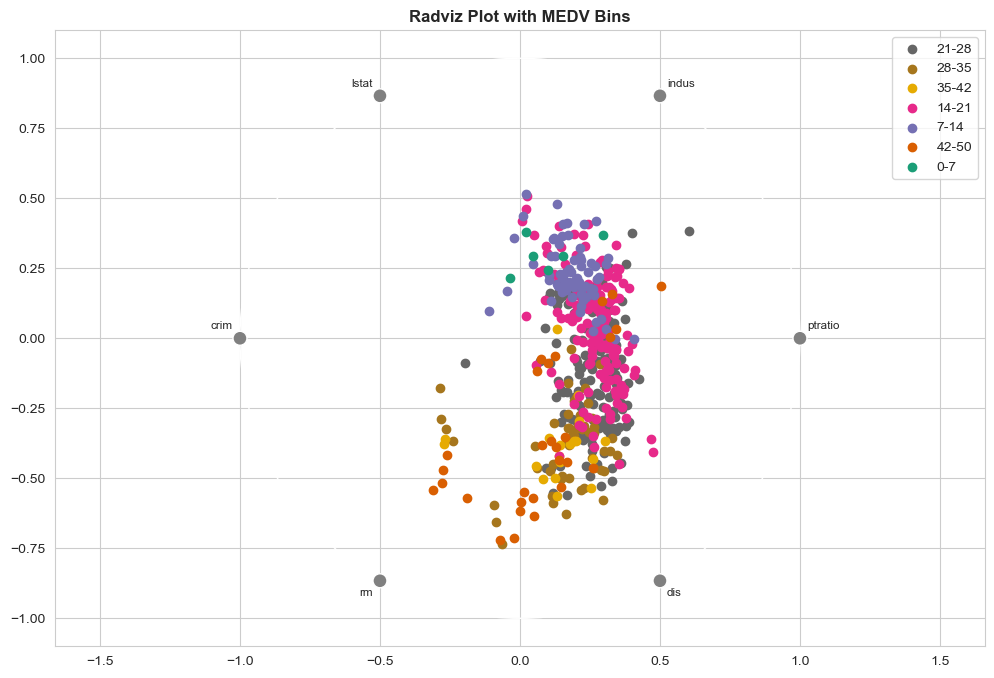

In [39]:
# Plot Radviz for the selected variables with 'medv_bins'
plt.figure(figsize=(12, 8))
radviz(boston_data[selected_features + ['medv_bins']], 'medv_bins', colormap='Dark2_r')
plt.title('Radviz Plot with MEDV Bins', fontweight='bold')
plt.show()

When observing the Radviz plot with the discrete ranges of `medv`, we can note the following important points:

1. **Point Distribution**: The points are distributed in such a way that the influence of each feature on the position of the observations can be seen. For example, points close to the `rm` axis indicate a higher average number of rooms.
2. **Multivariable Relationships**: The plot shows how the multiple features interact with each other. For example, we observe that points with high values in `rm` (average number of rooms) tend to cluster together, which may indicate a strong relationship with other factors influencing home value.

<br><br><p><h4> <b>Visualization of Chernoff Faces</b> </h4></p>

In this section, Chernoff Faces will be generated to visualize the selected features of the Boston housing dataset. Chernoff Faces allow for the representation of multivariable data in the form of human faces, where each feature is assigned to a specific facial trait. This technique facilitates the identification of patterns and differences between observations in an intuitive way.

First, the selected features will be normalized to ensure that they are all on the same scale. Then, a function will be defined to draw the Chernoff Faces, and finally, the faces will be generated and displayed for 100 random samples of both all features and those selected.

- **x1** = height of the upper face
- **x2** = overlap of the lower face
- **x3** = half the vertical size of the face
- **x4** = width of the upper face
- **x5** = width of the lower face
- **x6** = length of the nose
- **x7** = vertical position of the mouth
- **x8** = curvature of the mouth
- **x9** = width of the mouth
- **x10** = vertical position of the eyes
- **x11** = separation of the eyes
- **x12** = tilt of the eyes
- **x13** = eccentricity of the eyes
- **x14** = size of the eyes
- **x15** = position of the pupils
- **x16** = vertical position of the eyebrows
- **x17** = tilt of the eyebrows
- **x18** = size of the eyebrows

In [40]:
# Normalize the selected features
data = boston_data.drop('medv_bins', axis=1)
data = (data - data.min()) / (data.max() - data.min())

# Function to draw Chernoff faces
def cface(ax, x1,x2,x3,x4,x5,x6,x7=0.5,x8=0.5,x9=0.5,x10=0.5,x11=0.5,x12=0.5,x13=0.5,x14=0.5,x15=0.5,x16=0.5,x17=0.5,x18=0.5):
    # transform some values so that input between 0,1 yields variety of output
    x3 = 1.9*(x3-.5)
    x4 = (x4+.25)
    x5 = (x5+.2)
    x6 = .3*(x6+.01)
    x8 = 5*(x8+.001)
    x11 /= 5
    x12 = 2*(x12-.5)
    x13 += .05
    x14 += .1
    x15 = .5*(x15-.5)
    x16 = .25*x16
    x17 = .5*(x17-.5)
    x18 = .5*(x18+.1)

    # top of face, in box with l=-x4, r=x4, t=x1, b=x3
    e = matplotlib.patches.Ellipse((0,(x1+x3)/2), 2*x4, (x1-x3), fc='white', edgecolor='black', linewidth=2)
    ax.add_artist(e)

    # bottom of face, in box with l=-x5, r=x5, b=-x1, t=x2+x3
    e = matplotlib.patches.Ellipse((0,(-x1+x2+x3)/2), 2*x5, (x1+x2+x3), fc='white', edgecolor='black', linewidth=2)
    ax.add_artist(e)

    # cover overlaps
    e = matplotlib.patches.Ellipse((0,(x1+x3)/2), 2*x4, (x1-x3), fc='white', edgecolor='black', ec='none')
    ax.add_artist(e)
    e = matplotlib.patches.Ellipse((0,(-x1+x2+x3)/2), 2*x5, (x1+x2+x3), fc='white', edgecolor='black', ec='none')
    ax.add_artist(e)

    # draw nose
    ax.plot([0,0], [-x6/2, x6/2], 'k')
    
    # draw mouth
    p = matplotlib.patches.Arc((0,-x7+.5/x8), 1/x8, 1/x8, theta1=270-180/np.pi*np.arctan(x8*x9), theta2=270+180/np.pi*np.arctan(x8*x9))
    ax.add_artist(p)

    # draw eyes
    p = matplotlib.patches.Ellipse((-x11-x14/2,x10), x14, x13*x14, angle=-180/np.pi*x12, facecolor='white', edgecolor='black')
    ax.add_artist(p)
    p = matplotlib.patches.Ellipse((x11+x14/2,x10), x14, x13*x14, angle=180/np.pi*x12, facecolor='white', edgecolor='black')
    ax.add_artist(p)

    # draw pupils
    p = matplotlib.patches.Ellipse((-x11-x14/2-x15*x14/2, x10), .05, .05, facecolor='black')
    ax.add_artist(p)
    p = matplotlib.patches.Ellipse((x11+x14/2-x15*x14/2, x10), .05, .05, facecolor='black')
    ax.add_artist(p)
    
    # draw eyebrows
    ax.plot([-x11-x14/2-x14*x18/2,-x11-x14/2+x14*x18/2],[x10+x13*x14*(x16+x17),x10+x13*x14*(x16-x17)],'k')
    ax.plot([x11+x14/2+x14*x18/2,x11+x14/2-x14*x18/2],[x10+x13*x14*(x16+x17),x10+x13*x14*(x16-x17)],'k')

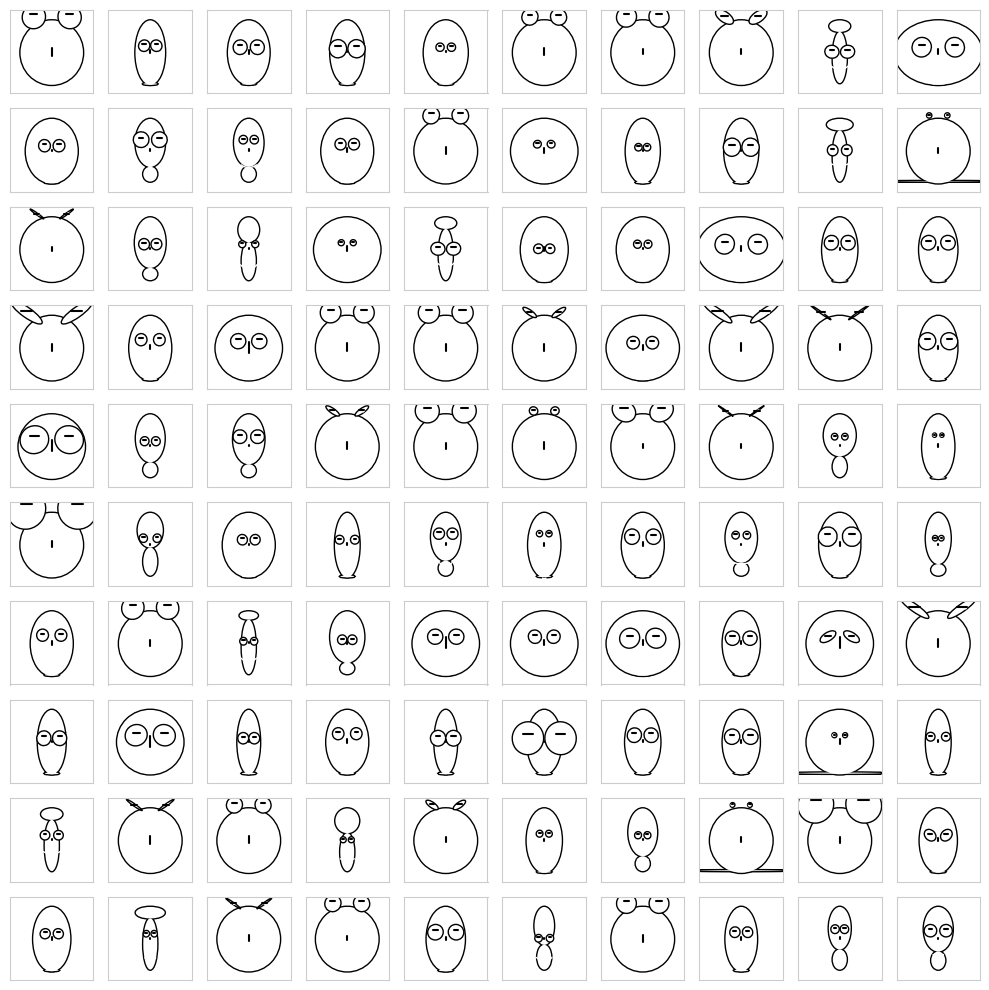

In [41]:
# Generate Chernoff faces for 100 random samples for all features
fig, ax = plt.subplots(10, 10, figsize=(10, 10))

for i in range(10):
    for j in range(10):
        sample = data.sample(1).values.flatten()
        cface(ax[i, j], .9, *sample)
        ax[i, j].axis([-1.2, 1.2, -1.2, 1.2])
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])
plt.tight_layout()
plt.show()

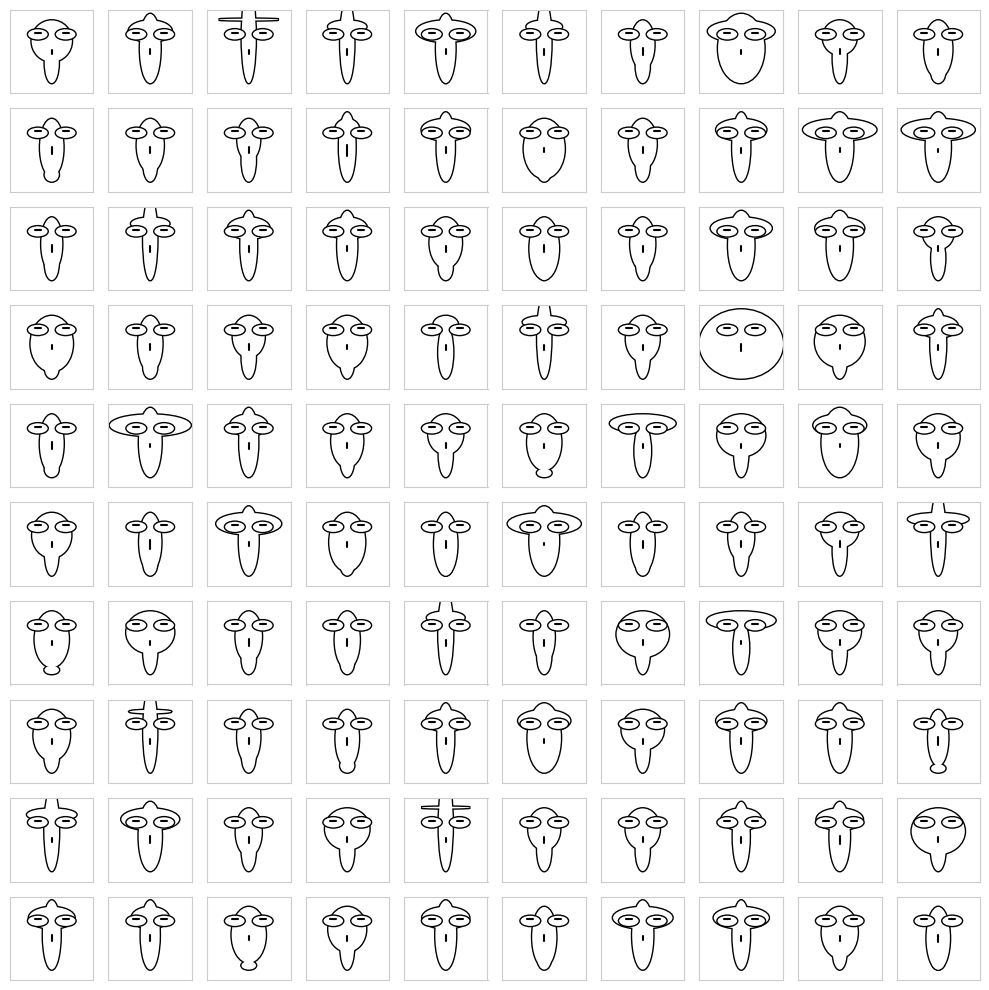

In [42]:
# Generate Chernoff faces for 100 random samples for selected features
fig, ax = plt.subplots(10, 10, figsize=(10, 10))

for i in range(10):
    for j in range(10):
        sample = data[selected_features].sample(1).values.flatten()
        cface(ax[i, j], .9, *sample)
        ax[i, j].axis([-1.2, 1.2, -1.2, 1.2])
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])
plt.tight_layout()
plt.show()

##### - *Chernoff Faces with All Features*

1. **Variability of the Faces**: The faces show a great variability in their facial traits, indicating that there is a wide variability in the feature values in the dataset. Differences in the height and width of the faces, as well as in the position and shape of the eyes, nose, and mouth, reflect the diversity of the features.
2. **Identification of Patterns**: By observing the faces, some visual patterns can be identified. For example, some faces have a more oval or rounded shape, which may be related to certain feature values. However, due to the high dimensionality, it may be difficult to identify clear patterns without more detailed analysis.

<br>

##### - *Chernoff Faces with Selected Features*

1. **Reduction of Complexity**: By using only the selected features (`crim`, `dis`, `indus`, `lstat`, `rm`, `ptratio`), the faces are less varied compared to the full set. This makes it easier to identify patterns and differences between the observations.
2. **Clearer Patterns**: With fewer features, it is easier to identify visual patterns. For example, the shape and size of the eyes and mouth may be more consistent among the faces, which can help identify observations with similar characteristics.
3. **Visible Relationships**: The relationships among the selected features are more visible. For instance, one can observe how certain combinations of `rm` (average number of rooms) and `lstat` (percentage of population with low socioeconomic status) affect the appearance of the faces.

<br><br><p><h4> <b>General Conclusions</b> </h4></p>

This project has conducted a comprehensive analysis of the Boston housing dataset, focusing on identifying and visualizing the most influential characteristics in the average home value (`medv`). Through various data analysis and visualization techniques, the following key conclusions have been drawn:

1. **Data Exploration and Distribution**: The initial exploration revealed that there are no missing values in the dataset, which facilitated analysis without the need for imputations. The visualizations of histograms and kernel density estimations (KDE) showed the variability of the features and the presence of outliers, especially in `crim` and `tax`.

2. **Relationships between Variables**: Scatter plots and correlations showed significant relationships between various features and `medv`. In particular, clear positive relationships were identified between the average number of rooms (`rm`) and `medv`, as well as strong negative relationships between the percentage of population with low socioeconomic status (`lstat`) and `medv`. In other words, as the number of rooms increases and/or the percentage of the population with low socioeconomic status decreases, the average home value increases.

3. **Importance of Features**: Using a Random Forest model, the importance of each feature in predicting `medv` was evaluated. The features `rm` and `lstat` stood out as the most influential. By combining the results of the correlations and the feature importances, `crim`, `dis`, `indus`, `lstat`, `rm`, and `ptratio` were selected for further analysis.

4. **Advanced Visualization**: Advanced visualization techniques, such as Andrew's Curves and the Radviz plot, allowed for intuitive observation of patterns and groupings in the data, such as a greater tendency of the dataset towards the average number of rooms and the weighted distances to employment in the area. These techniques helped identify how the different features group according to the average home value (`medv`).

5. **Chernoff Faces**: The generation of Chernoff Faces for both all features and selected ones provided a visual way to identify patterns and variability in the data. The faces generated with all features showed greater variability, while the faces with selected features allowed for clearer identification of visual patterns.

<br><p><h4> <b>Recommendations</b> </h4></p>

- **Outlier Analysis**: Since some variables present significant outliers, it would be beneficial to conduct a more detailed analysis of these values to understand their impact on the model and, if necessary, consider methods for handling them.

- **Interactive Visualizations**: Utilize interactive visualization tools, such as Tableau or Plotly, to explore the data more dynamically and facilitate the identification of complex patterns.

<br><p><h4> <b>Conclusion</b> </h4></p>

The analysis conducted provides a deep understanding of the features that influence home values in Boston. Advanced visualization techniques and a focus on key features have allowed for the identification of significant patterns and relationships in the data. This approach can serve as a foundation for future studies and applications in property assessment and urban planning.